In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\Shriya Bhat\Downloads\archive\Train.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [3]:
df_train = pd.read_csv(r'C:\Users\Shriya Bhat\Downloads\archive\Train.csv')
df_train.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [4]:
df_test = pd.read_csv(r'C:\Users\Shriya Bhat\Downloads\archive\Test.csv')
df_test.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [5]:
df_v = pd.read_csv(r'C:\Users\Shriya Bhat\Downloads\archive\Valid.csv')
df_v.head()

,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0


# cleaning

In [6]:
import re
def clean(t):
    t=t.lower();
    t=re.sub(r'http\S+',"",t)
    t=re.sub(r'[^a-zA-Z\s]','',t)
    return t


In [7]:
df_train['text']=df_train['text'].apply(clean)
df_test['text']=df_test['text'].apply(clean)
df_v['text']=df_v['text'].apply(clean)

# tokenize

In [8]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Shriya
[nltk_data]     Bhat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
def tokenize(s):
    t=word_tokenize(s)
    return t


In [10]:
df_train['text']=df_train['text'].apply(tokenize)
df_test['text']=df_test['text'].apply(tokenize)
df_v['text']=df_v['text'].apply(tokenize)
#apply is a DataFrame or Series method used to apply a function to each element (or row, or column) in a DataFrame

In [11]:
df_v.head()

,text,label
0,"[its, been, about, years, since, sharon, stone...",0
1,"[someone, needed, to, make, a, car, payment, t...",0
2,"[the, guidelines, state, that, a, comment, mus...",0
3,"[this, movie, is, a, muddled, mishmash, of, cl...",0
4,"[before, stan, laurel, became, the, smaller, h...",0


# stopword removal

In [12]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Shriya
[nltk_data]     Bhat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
stop_words=set(stopwords.words('english'))

In [14]:
def remove_sw(t):
    new_l=[i for i in t if i not in stop_words]
    return new_l

In [15]:
df_train['text']=df_train['text'].apply(remove_sw)
df_test['text']=df_test['text'].apply(remove_sw)
df_v['text']=df_v['text'].apply(remove_sw)

In [16]:
df_v.head()

,text,label
0,"[years, since, sharon, stone, awarded, viewers...",0
1,"[someone, needed, make, car, payment, truly, a...",0
2,"[guidelines, state, comment, must, contain, mi...",0
3,"[movie, muddled, mishmash, clichs, recent, cin...",0
4,"[stan, laurel, became, smaller, half, alltime,...",0


# lemmatization

In [17]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer=WordNetLemmatizer()
def l(t):
    new_l=[lemmatizer.lemmatize(i,pos='v') for i in t]
    return new_l

df_train['text']=df_train['text'].apply(l)
df_test['text']=df_test['text'].apply(l)
df_v['text']=df_v['text'].apply(l)

In [18]:
df_v.head()

,text,label
0,"[years, since, sharon, stone, award, viewers, ...",0
1,"[someone, need, make, car, payment, truly, awf...",0
2,"[guidelines, state, comment, must, contain, mi...",0
3,"[movie, muddle, mishmash, clichs, recent, cine...",0
4,"[stan, laurel, become, smaller, half, alltime,...",0


In [19]:
df_train['text']=df_train['text'].apply(lambda r:' '.join(r))
df_test['text']=df_test['text'].apply(lambda r:' '.join(r))
df_v['text']=df_v['text'].apply(lambda r:' '.join(r))

In [20]:
df_v

,text,label
0,years since sharon stone award viewers legcros...,0
1,someone need make car payment truly awful make...,0
2,guidelines state comment must contain minimum ...,0
3,movie muddle mishmash clichs recent cinema pro...,0
4,stan laurel become smaller half alltime greate...,0
...,...,...
4995,man love movie really take back kid days teach...,1
4996,recovery incredibly move piece work handle dev...,1
4997,take crook joint seem exceedingly difficult ta...,1
4998,futz show preserve experimental theatre moveme...,1


# tokenizing and padding

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

t=Tokenizer(10000,oov_token="<OOV>")

t.fit_on_texts(df_train['text'])
train_seq=t.texts_to_sequences(df_train['text'])
train_seq=pad_sequences(train_seq,200,padding='post',truncating='post')

t.fit_on_texts(df_test['text'])
test_seq=t.texts_to_sequences(df_test['text'])
test_seq=pad_sequences(test_seq,200,padding='post',truncating='post')

t.fit_on_texts(df_v['text'])
v_seq=t.texts_to_sequences(df_v['text'])
v_seq=pad_sequences(v_seq,200,padding='post',truncating='post')

# handling prediction or labels

In [28]:
# train_labels=pd.get_dummies(df_train['label']).values
# test_labels=pd.get_dummies(df_test['label']).values
# v_labels=pd.get_dummies(df_v['label']).values
train_labels=(df_train['label']).values
test_labels=(df_test['label']).values
v_labels=(df_v['label']).values


# model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, GRU, Bidirectional
from tensorflow.keras.optimizers import Adam

In [30]:
m1=Sequential([
    Embedding(10000,128,input_length=200),
    LSTM(64,return_sequences=True),
    LSTM(32,return_sequences=True),
    LSTM(16),
    Dense(1,activation='sigmoid')
])
m1.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['acc'])

In [31]:
m1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 128)          1280000   
                                                                 
 lstm_3 (LSTM)               (None, 200, 64)           49408     
                                                                 
 lstm_4 (LSTM)               (None, 200, 32)           12416     
                                                                 
 lstm_5 (LSTM)               (None, 16)                3136      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1344977 (5.13 MB)
Trainable params: 1344977 (5.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
h1=m1.fit(train_seq,train_labels,epochs=5,validation_data=(v_seq,v_labels))

Epoch 1/5
1250/1250 [==============================] - 353s 277ms/step - loss: 0.6749 - acc: 0.5536 - val_loss: 0.7991 - val_acc: 0.5390
Epoch 2/5
1250/1250 [==============================] - 370s 296ms/step - loss: 0.6117 - acc: 0.6769 - val_loss: 0.7313 - val_acc: 0.5692
Epoch 3/5
1250/1250 [==============================] - 332s 266ms/step - loss: 0.6858 - acc: 0.5282 - val_loss: 0.7017 - val_acc: 0.5266
Epoch 4/5
1250/1250 [==============================] - 377s 302ms/step - loss: 0.6607 - acc: 0.5986 - val_loss: 0.7068 - val_acc: 0.5286
Epoch 5/5
1250/1250 [==============================] - 461s 369ms/step - loss: 0.6708 - acc: 0.5677 - val_loss: 0.7239 - val_acc: 0.5306


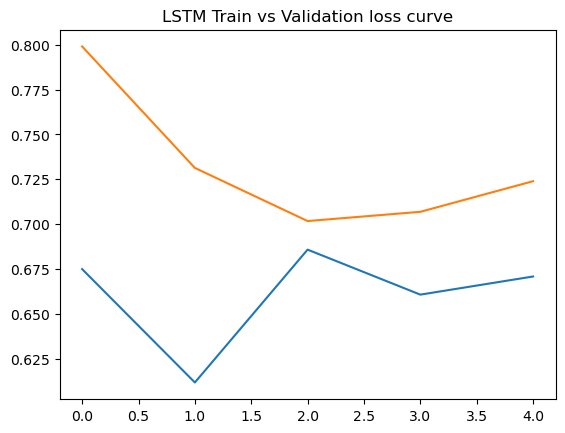

In [33]:
plt.title('LSTM Train vs Validation loss curve')
plt.plot(range(5),h1.history['loss'],label='training loss')
plt.plot(range(5),h1.history['val_loss'],label='val loss')

In [34]:
m2=Sequential([
    Embedding(10000,128,input_length=200),
    GRU(64,return_sequences=True),
    GRU(32,return_sequences=True),
    GRU(16),
    Dense(1,activation='sigmoid')
])
m2.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['acc'])

In [35]:
h2=m1.fit(train_seq,train_labels,epochs=5,validation_data=(v_seq,v_labels))

Epoch 1/5
1250/1250 [==============================] - 378s 302ms/step - loss: 0.6230 - acc: 0.6379 - val_loss: 0.7447 - val_acc: 0.6110
Epoch 2/5
1250/1250 [==============================] - 361s 289ms/step - loss: 0.3366 - acc: 0.8640 - val_loss: 0.7922 - val_acc: 0.6212
Epoch 3/5
1250/1250 [==============================] - 334s 267ms/step - loss: 0.2451 - acc: 0.9061 - val_loss: 0.8808 - val_acc: 0.6076
Epoch 4/5
1250/1250 [==============================] - 304s 243ms/step - loss: 0.1988 - acc: 0.9257 - val_loss: 0.9208 - val_acc: 0.6116
Epoch 5/5
1250/1250 [==============================] - 335s 268ms/step - loss: 0.1526 - acc: 0.9477 - val_loss: 1.0650 - val_acc: 0.6056


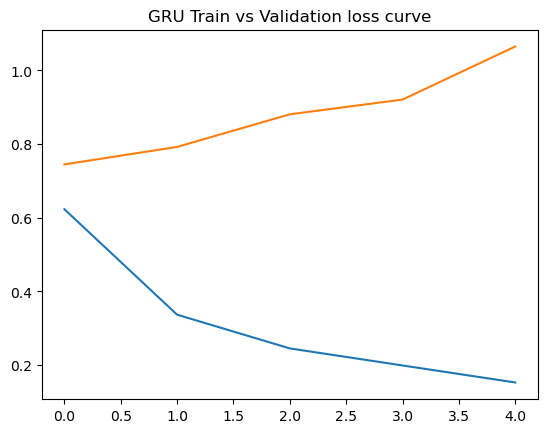

In [36]:
plt.title('GRU Train vs Validation loss curve')
plt.plot(range(5),h2.history['loss'],label='training loss')
plt.plot(range(5),h2.history['val_loss'],label='val loss')

In [37]:
m3=Sequential([
    Embedding(10000,128,input_length=200),
    Bidirectional(LSTM(64,return_sequences=True)),
    Bidirectional(LSTM(32,return_sequences=True)),
    Bidirectional(LSTM(16)),
    Dense(1,activation='sigmoid')
])
m3.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['acc'])

In [38]:
h3=m1.fit(train_seq,train_labels,epochs=5,validation_data=(v_seq,v_labels))

Epoch 1/5
1250/1250 [==============================] - 474s 379ms/step - loss: 0.1109 - acc: 0.9661 - val_loss: 1.1908 - val_acc: 0.6046
Epoch 2/5
1250/1250 [==============================] - 458s 366ms/step - loss: 0.0828 - acc: 0.9779 - val_loss: 1.3811 - val_acc: 0.6048
Epoch 3/5
1250/1250 [==============================] - 468s 374ms/step - loss: 0.0670 - acc: 0.9832 - val_loss: 1.6275 - val_acc: 0.6124
Epoch 4/5
1250/1250 [==============================] - 451s 361ms/step - loss: 0.0614 - acc: 0.9848 - val_loss: 1.5432 - val_acc: 0.6094
Epoch 5/5
1250/1250 [==============================] - 479s 384ms/step - loss: 0.0508 - acc: 0.9879 - val_loss: 1.6068 - val_acc: 0.6100


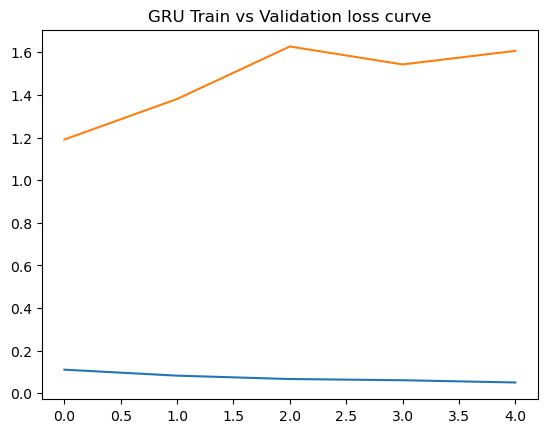

In [39]:
plt.title('GRU Train vs Validation loss curve')
plt.plot(range(5),h3.history['loss'],label='training loss')
plt.plot(range(5),h3.history['val_loss'],label='val loss')

In [40]:
l1,a1=m1.evaluate(test_seq,test_labels)
l2,a2=m2.evaluate(test_seq,test_labels)
l3,a3=m3.evaluate(test_seq,test_labels)


157/157 [==============================] - 32s 146ms/step - loss: 0.6934 - acc: 0.4978


In [53]:

results=pd.DataFrame({
    "Model": ["3-layer LSTM","3 layer GRU","Bidirectional LSTM"],
    "Test Accuracy": [a1,a2,a3],
    "Test loss":[l1,l2,l3],
    "training acc":[np.array(h1.history['acc']).mean(),np.array(h2.history['acc']).mean(),np.array(h3.history['acc']).mean()],
    "training loss":[np.array(h1.history['loss']).mean(),np.array(h2.history['loss']).mean(),np.array(h3.history['loss']).mean()]
})


In [54]:
results

,Model,Test Accuracy,Test loss,training acc,training loss
0,3-layer LSTM,0.6126,1.572310,0.584975,0.660748
1,3 layer GRU,0.5016,0.693149,0.856275,0.311218
2,Bidirectional LSTM,0.4978,0.693353,0.979965,0.074598


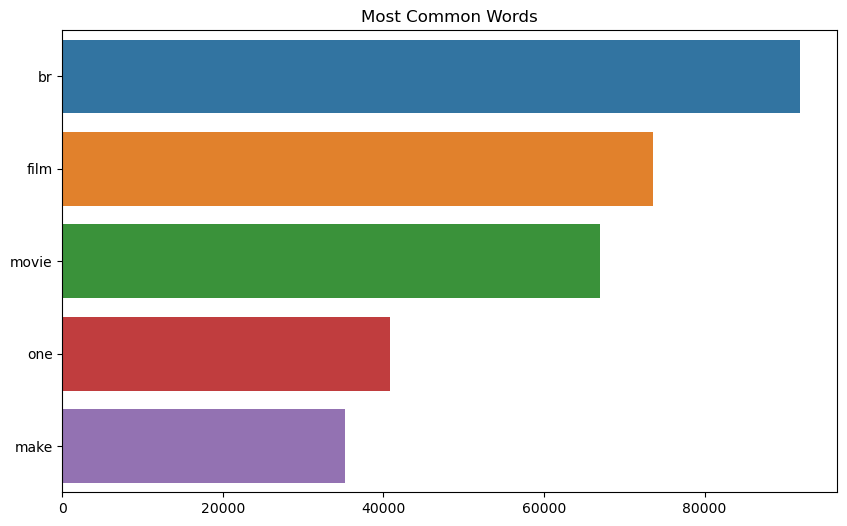

In [72]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


text = df_train['text'].tolist()  # Replace 'text_column_name' with the column containing your text data

# Tokenize the text data
word_list = []
for sentence in text:
    tokens = sentence.split()  # Simple tokenization by splitting on whitespace
    word_list.extend(tokens)

# Calculate word frequency
word_freq = Counter(word_list)

# Extract the top 5 most common words and their counts
words = [word[0] for word in word_freq.most_common(5)]
counts = [word[1] for word in word_freq.most_common(5)]

# Plot the most common words
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words)
plt.title('Most Common Words')
plt.show()


In [75]:
word_freq

Counter({'grow': 1705,
         'b': 981,
         'watch': 21812,
         'love': 13666,
         'thunderbirds': 56,
         'mat': 158,
         'school': 2730,
         'play': 13531,
         'lunch': 103,
         'want': 10458,
         'virgil': 20,
         'scott': 784,
         'one': 40853,
         'alan': 448,
         'count': 794,
         'become': 6032,
         'art': 1748,
         'form': 1427,
         'take': 13770,
         'children': 2046,
         'see': 32722,
         'movie': 66987,
         'hop': 1364,
         'would': 19224,
         'get': 28510,
         'glimpse': 337,
         'child': 1709,
         'bitterly': 33,
         'disappoint': 2181,
         'high': 3071,
         'point': 6114,
         'snappy': 66,
         'theme': 1891,
         'tune': 515,
         'could': 12168,
         'compare': 1559,
         'original': 4951,
         'score': 1939,
         'thankfully': 310,
         'early': 2454,
         'saturday': 333,
         'm

In [3]:
df = pd.read_csv(r'C:\Users\Shriya Bhat\Downloads\archive\Train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [4]:
df_train = pd.read_csv(r'C:\Users\Shriya Bhat\Downloads\archive\Train.csv')
df_train.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [5]:
import re


In [6]:
def clean(t):
    t=t.lower();
    t=re.sub(r'http\S+',"",t)
    t=re.sub(r'[^a-zA-Z\s]',"",t)
    return t

In [7]:
df_train['text']=df_train['text'].apply(clean)

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:
t=Tokenizer(10000,oov_token="<oov>")

In [11]:
t.fit_on_texts(df_train['text'])
train_seq=t.texts_to_sequences(df_train['text'])


In [13]:
train_seq=pad_sequences(train_seq,200,padding='post')

In [14]:
train_labels=df_train['label'].values

In [16]:
np.array(train_labels)

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, GRU, Bidirectional
from tensorflow.keras.optimizers import Adam

In [21]:
m1=Sequential([
    Embedding(10000,128,input_length=200),
    LSTM(64,return_sequences=True),
    LSTM(32,return_sequences=True),
    LSTM(16),
    Dense(1,activation='sigmoid')
])
m1.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['acc'])

In [ ]:
h1=m1.fit(train_seq,train_labels,epochs=5,validation_split=0.1)

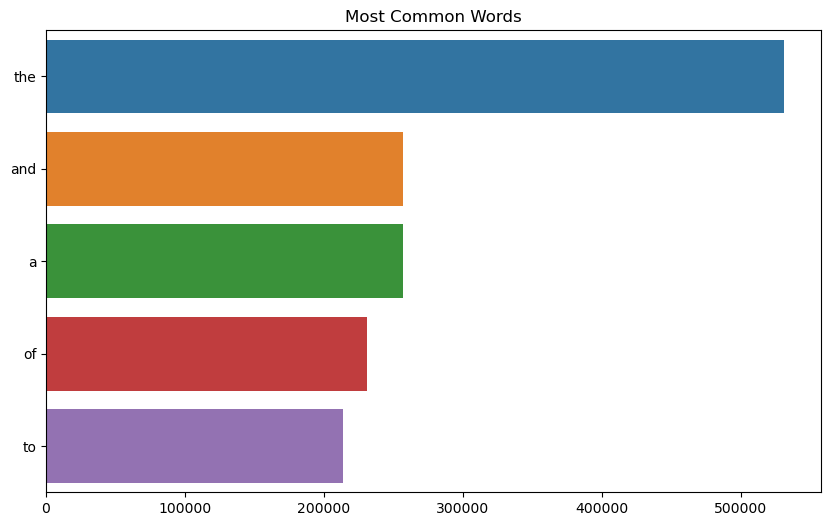

In [17]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


text = df_train['text'].tolist()  # Replace 'text_column_name' with the column containing your text data

# Tokenize the text data
word_list = []
for sentence in text:
    tokens = sentence.split()  # Simple tokenization by splitting on whitespace
    word_list.extend(tokens)

# Calculate word frequency
word_freq = Counter(word_list)

# Extract the top 5 most common words and their counts
words = [word[0] for word in word_freq.most_common(5)]
counts = [word[1] for word in word_freq.most_common(5)]

# Plot the most common words
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words)
plt.title('Most Common Words')
plt.show()


In [18]:
df_train['text']

0        i grew up b  watching and loving the thunderbi...
1        when i put this movie in my dvd player and sat...
2        why do people who do not know what a particula...
3        even though i have great interest in biblical ...
4        im a die hard dads army fan and nothing will e...
                               ...                        
39995    western union is something of a forgotten clas...
39996    this movie is an incredible piece of work it e...
39997    my wife and i watched this movie because we pl...
39998    when i first watched flatliners i was amazed i...
39999    why would this film be so good but only gross ...
Name: text, Length: 40000, dtype: object